# Análisis Básico del Dataset Integrado

Notebook rápido para explorar `output/final/dataset_final.csv`.

**Objetivos:**
- Comprobar forma y esquema.
- Estadísticos descriptivos.
- 5–6 gráficos sencillos para producto, renta, delitos y duración de llamadas.

> Requisitos: `pandas`, `matplotlib`. No se usa seaborn.

## 1. Carga de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

PATH = Path('output/final/integration.csv')  # ajusta si tu ruta es distinta
assert PATH.exists(), f'No existe el archivo: {PATH!s}'
df = pd.read_csv(PATH)
print('Ruta:', PATH)
print('Shape:', df.shape)
df.head()

Ruta: output/final/integration.csv
Shape: (9077, 23)


,sessionID,DNI,Telef,CP,duration_call_mins,Producto,Adosado,Bajo,Chalet,Con Perro,...,Sin Perro,Sin Rejas,Unifamiliar,municipio_renta,municipio_norm,periodo_renta,renta_media,anio,tipo_delito,tasa
0,MC40MDA1NDM0MzY5MzYyODE4,X88537286,671483480,28520,13.481688,Home Premium Plus,0,0,1,0,...,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MC40MDA2OTkxNDAyNzA5Nzcz,X67868023,669613626,28758,7.066443,NaN,1,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MC40MDA5Mzc0NTc5MzM5OTAxNg==,X22379422,688974839,28001,14.197395,Home Premium,0,1,0,1,...,0,0,0,"28001 Acebeda, La","28001 ACEBEDA, LA",2020.0,NaN,NaN,NaN,NaN
3,MC40MDA5MzgwNDg5NzU2ODM2NA==,X95888915,604709311,28678,6.940735,NaN,0,1,0,0,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MC40MDA5NjA1MDcwNjY2MzQ1NQ==,X76422588,610413816,28881,5.674006,NaN,0,1,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Esquema y valores nulos

In [3]:
print('Columnas:', df.columns.tolist())
print('\nInfo:')
print(df.info())

print('\n% de nulos por columna (top 20):')
nulls = df.isna().mean().sort_values(ascending=False).head(20)
nulls

Columnas: ['sessionID', 'DNI', 'Telef', 'CP', 'duration_call_mins', 'Producto', 'Adosado', 'Bajo', 'Chalet', 'Con Perro', 'Con Rejas', 'Intermedio', 'Piso', 'Sin Perro', 'Sin Rejas', 'Unifamiliar', 'municipio_renta', 'municipio_norm', 'periodo_renta', 'renta_media', 'anio', 'tipo_delito', 'tasa']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9077 entries, 0 to 9076
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sessionID           9076 non-null   object 
 1   DNI                 9077 non-null   object 
 2   Telef               9077 non-null   int64  
 3   CP                  9077 non-null   int64  
 4   duration_call_mins  9077 non-null   float64
 5   Producto            3046 non-null   object 
 6   Adosado             9077 non-null   int64  
 7   Bajo                9077 non-null   int64  
 8   Chalet              9077 non-null   int64  
 9   Con Perro           9077 non-null   int64  


tasa                  1.000000
tipo_delito           1.000000
anio                  1.000000
renta_media           0.813374
municipio_renta       0.805112
periodo_renta         0.805112
municipio_norm        0.805112
Producto              0.664427
sessionID             0.000110
Con Perro             0.000000
Con Rejas             0.000000
DNI                   0.000000
Piso                  0.000000
Sin Perro             0.000000
Sin Rejas             0.000000
Unifamiliar           0.000000
Chalet                0.000000
Bajo                  0.000000
Adosado               0.000000
duration_call_mins    0.000000
dtype: float64

## 3. Estadística descriptiva

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numéricas detectadas:', num_cols)
df[num_cols].describe().T if num_cols else pd.DataFrame()

Numéricas detectadas: ['Telef', 'CP', 'duration_call_mins', 'Adosado', 'Bajo', 'Chalet', 'Con Perro', 'Con Rejas', 'Intermedio', 'Piso', 'Sin Perro', 'Sin Rejas', 'Unifamiliar', 'periodo_renta', 'renta_media', 'anio', 'tipo_delito', 'tasa']


,count,mean,std,min,25%,50%,75%,max
Telef,9077.0,6.510870e+08,2.869356e+07,6.000637e+08,6.268410e+08,6.517098e+08,6.762436e+08,6.999176e+08
CP,9077.0,2.847953e+04,2.887913e+02,2.800000e+04,2.823000e+04,2.846500e+04,2.872200e+04,2.899900e+04
duration_call_mins,9077.0,1.104372e+01,7.717268e+00,3.485992e-04,4.809160e+00,8.942486e+00,1.699854e+01,3.760871e+01
Adosado,9077.0,2.050237e-01,4.037412e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Bajo,9077.0,4.142338e-01,4.926164e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Chalet,9077.0,3.983695e-01,4.895893e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Con Perro,9077.0,3.003195e-01,4.584221e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Con Rejas,9077.0,4.017847e-01,4.902859e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Intermedio,9077.0,1.873967e-01,3.902512e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Piso,9077.0,6.016305e-01,4.895893e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 4. Distribución de productos contratados

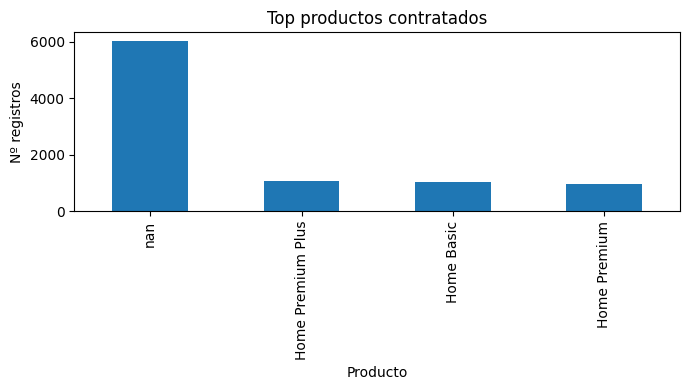

In [5]:
if 'Producto' in df.columns:
    plt.figure(figsize=(7,4))
    df['Producto'].astype(str).value_counts().head(10).plot(kind='bar')
    plt.title('Top productos contratados')
    plt.ylabel('Nº registros')
    plt.tight_layout()
    plt.show()
else:
    print('Columna Producto no disponible')

## 5. Distribución de la renta media

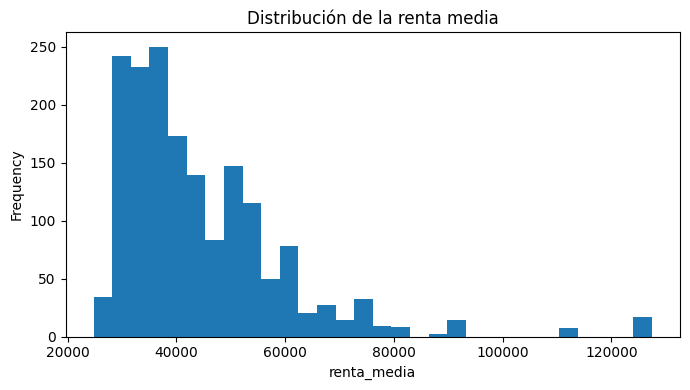

In [6]:
if 'renta_media' in df.columns and df['renta_media'].notna().any():
    plt.figure(figsize=(7,4))
    df['renta_media'].dropna().plot(kind='hist', bins=30)
    plt.title('Distribución de la renta media')
    plt.xlabel('renta_media')
    plt.tight_layout()
    plt.show()
else:
    print('renta_media vacía o no disponible')

## 6. Duración de llamadas por producto (boxplot)

<Figure size 800x400 with 0 Axes>

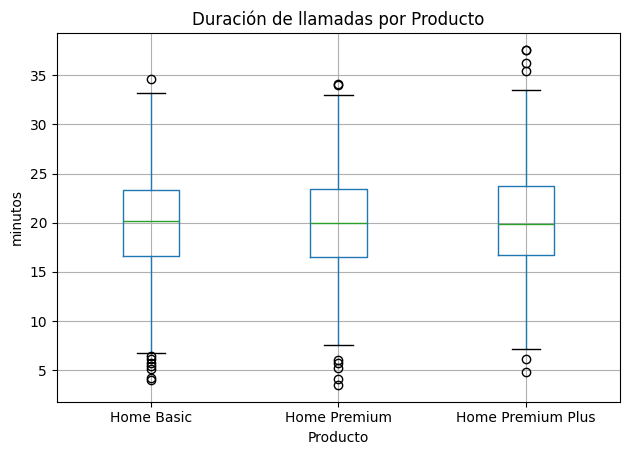

In [7]:
if 'duration_call_mins' in df.columns and df['duration_call_mins'].notna().any() and 'Producto' in df.columns:
    plt.figure(figsize=(8,4))
    df.boxplot(column='duration_call_mins', by='Producto')
    plt.title('Duración de llamadas por Producto')
    plt.suptitle('')
    plt.ylabel('minutos')
    plt.tight_layout()
    plt.show()
else:
    print('duration_call_mins o Producto no disponibles / sin datos')

## 7. Municipios con más llamadas

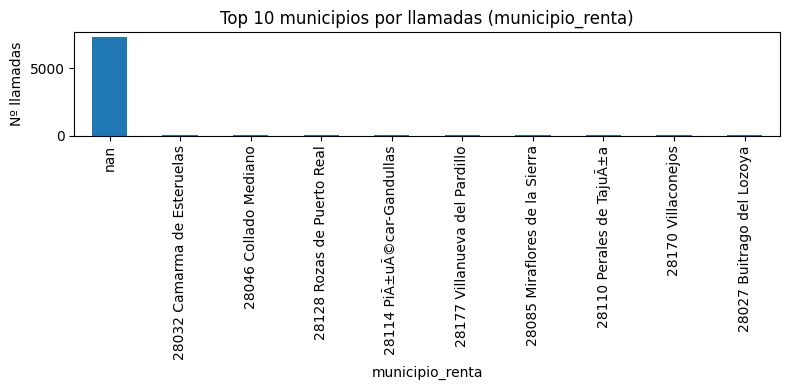

In [8]:
col_muni = None
for c in ['municipio_renta','municipio','municipio_delitos']:
    if c in df.columns:
        col_muni = c
        break
if col_muni:
    plt.figure(figsize=(8,4))
    df[col_muni].astype(str).value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 municipios por llamadas ({col_muni})')
    plt.ylabel('Nº llamadas')
    plt.tight_layout()
    plt.show()
else:
    print('No hay columna de municipio reconocible')

## 8. Relación renta vs. tasa de delitos

In [9]:
if {'renta_media','tasa'}.issubset(df.columns) and df['renta_media'].notna().any() and df['tasa'].notna().any():
    plt.figure(figsize=(7,4))
    df.plot(kind='scatter', x='renta_media', y='tasa', alpha=0.5)
    plt.title('Renta media vs Tasa de delitos')
    plt.tight_layout()
    plt.show()
else:
    print('No hay datos suficientes para el scatter renta vs tasa')

No hay datos suficientes para el scatter renta vs tasa


## 9. Correlaciones numéricas (tabla)

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].corr().round(3) if len(num_cols) else pd.DataFrame()

,Telef,CP,duration_call_mins,Adosado,Bajo,Chalet,Con Perro,Con Rejas,Intermedio,Piso,Sin Perro,Sin Rejas,Unifamiliar,periodo_renta,renta_media,anio,tipo_delito,tasa
Telef,1.000,-0.032,0.004,0.042,-0.014,0.024,-0.027,-0.002,-0.012,-0.024,0.002,0.011,-0.013,NaN,0.004,NaN,NaN,NaN
CP,-0.032,1.000,0.021,0.008,-0.031,0.017,-0.016,-0.020,0.018,-0.017,-0.002,0.005,0.013,NaN,-0.072,NaN,NaN,NaN
duration_call_mins,0.004,0.021,1.000,0.020,-0.006,0.022,-0.039,0.019,-0.020,-0.022,0.016,-0.003,0.007,NaN,0.032,NaN,NaN,NaN
Adosado,0.042,0.008,0.020,1.000,-0.427,0.624,-0.333,0.095,-0.244,-0.624,-0.333,0.098,-0.249,NaN,-0.028,NaN,NaN,NaN
Bajo,-0.014,-0.031,-0.006,-0.427,1.000,-0.684,0.357,0.147,-0.404,0.684,0.374,0.173,-0.412,NaN,0.058,NaN,NaN,NaN
Chalet,0.024,0.017,0.022,0.624,-0.684,1.000,-0.533,0.165,-0.391,-1.000,-0.534,0.145,0.602,NaN,-0.079,NaN,NaN,NaN
Con Perro,-0.027,-0.016,-0.039,-0.333,0.357,-0.533,1.000,-0.086,0.219,0.533,-0.430,-0.088,-0.321,NaN,-0.026,NaN,NaN,NaN
Con Rejas,-0.002,-0.020,0.019,0.095,0.147,0.165,-0.086,1.000,-0.394,-0.165,-0.091,-0.684,0.107,NaN,0.024,NaN,NaN,NaN
Intermedio,-0.012,0.018,-0.020,-0.244,-0.404,-0.391,0.219,-0.394,1.000,0.391,0.198,-0.401,-0.235,NaN,0.026,NaN,NaN,NaN
Piso,-0.024,-0.017,-0.022,-0.624,0.684,-1.000,0.533,-0.165,0.391,1.000,0.534,-0.145,-0.602,NaN,0.079,NaN,NaN,NaN
